#  <div style="direction:rtl ;font-family: B Nazanin ;font-size:77px; line-height: 170%; text-align: center"> به نام خدا</div>


 <div style="direction:rtl ;font-family: B Nazanin ;font-size:18px; line-height: 170%; text-align: right">

.... بر خلاف تصور می توان از یادگیری عمیق برای داده های جدولی مثل داده هایی که در دیتابیس های SQL یا دیتافریم های پانداس ذخیره می شوند استفاده کرد. داده های جدولی پرکاربردترین نوع داده استفاده شده در صنعت است ولی به کارگیری یادگیری عمیق بر روی آن ها  خیلی مورد توجه قرار نگرفته است.
</div> 





 <div style="direction:rtl ;font-family: B Nazanin ;font-size:18px; line-height: 170%; text-align: right">
 دو نوع ستون در داده های ساختار یافته داریم:
  <li> 
  	دسته ای : که چندین سطح دارد مانند جنسیت
 </li>
   <li> پیوسته : که از اعدادی تشکیل شده است که تفاوت یا نسبت این اعداد معنای خاصی دارد مانند سن
</li>  

</div>

In [3]:
import pandas as pd
import numpy as np

<div style="direction:rtl ;font-family: B Nazanin ;font-size:45px; line-height: 170%; text-align: center"> 

چه کسی در تایتانیک زنده می ماند؟</div>

![title](images/titanic.PNG)

https://www.kaggle.com/c/titanic/data

In [4]:
#titanic = pd.read_csv('data/titanic/datasets/titanic.csv')
titanic = pd.read_csv('data/titanic/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test = pd.read_csv('data/titanic/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
len(pd.unique(titanic['Ticket']))

681

In [10]:
titanic.drop(['PassengerId','Name','Ticket' ], axis = 1, inplace=True)
titanic.shape

(891, 9)

In [11]:
test.drop(['PassengerId','Name','Ticket' ], axis = 1, inplace=True)
test.shape

(418, 8)

In [12]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


 <div style="direction:rtl ;font-family: B Nazanin ;font-size:18px; line-height: 170%; text-align: right">
کامپیوترها متغیرهای دسته ای را نمی فهمند!
</div> 

In [13]:
from sklearn.tree import DecisionTreeClassifier
x = titanic.drop('Survived',axis = 1)
y = titanic['Survived']
dt = DecisionTreeClassifier()
dt.fit(x,y)

ValueError: could not convert string to float: 'Q'

 <div style="direction:rtl ;font-family: B Nazanin ;font-size:18px; line-height: 170%; text-align: right">برای حل این مشکل و تبدیل این متغیرهای دسته ای به متغیرهای عددی به صورت عمده در یادگیری ماشین از تکنیکی به اسم one-hot-encoding استفاده می شود.
</div> 

In [14]:
titanic_dummy = pd.get_dummies(titanic,columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Cabin',
       'Embarked'])
titanic_dummy.head()

,Survived,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_0.42,Age_0.67,Age_0.75,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,0,7.2500,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,71.2833,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,7.9250,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,53.1000,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,8.0500,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [15]:
from sklearn.tree import DecisionTreeClassifier
x = titanic_dummy.drop('Survived',axis = 1)
y = titanic_dummy['Survived']
dt = DecisionTreeClassifier()
dt.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

<div style="direction:rtl ;font-family: B Nazanin ;font-size:45px; line-height: 170%; text-align: center"> 

تعبیه سازی نهادی (Entity Embedding)

</div>



 <div style="direction:rtl ;font-family: B Nazanin ;font-size:18px; line-height: 170%; text-align: right">
همانگونه که دیدیم تعبیه سازی به صورت گسترده در پردازش زبان طبیعی به کار می رود. در این تعبیه سازی هر کلمه به صورت یکبردار با   اندازه ثابت بازنمایی می شود.  دو مثال معروف از تعبیه سازی Glov و Word2ec هستند. تعبیه سازی نهاد هم تفاوت زیادی نسبت به تعبیه سازی کلمات ندارد. یعنی اگر دسته های متغیر را نیز همانند کلمات در نظر بگیریم در تعبیه سازی نهاد هم به دنبال این هستیم که یک بازنمایی برداری با ابعاد بالا را از آن ها به دست آوریم  یعنی به هر مقدار یکتای یک دسته یک بردار با طول ثابت اختصاص دهیم. در حقیقت تعبیه سازی نهادها از پردازش زبان طبیعی الهام گرفته شده است.
</div> 

![title](images/word2vec.PNG)

 <div style="direction:rtl ;font-family: B Nazanin ;font-size:18px; line-height: 170%; text-align: right">

انتخاب بین متغیر دسته ای و پیوسته یک تصمیم مدل سازی است که باید بگیریم. به صورت عمومی متغیرهایی که اعداد اعشاری هستند را به سختی میتعبیه سازی نهادی به نوعی یک سطح بالاتر از روش های تخصیص عدد به مقادیر متغیرهای دسته ای است با این تفاوت که به جای این که یک عدد به
دسته تخصیص دهیم یک بردار را به آن تخصیص می دهیم.
</div> 

![title](images/weeks.PNG)

 <div style="direction:rtl ;font-family: B Nazanin ;font-size:18px; line-height: 170%; text-align: right">
 که دارای cardinality خیلی بالا  نیستند را دارند نگه نمی داریم را از متغیرهای عددی جدا می کنیم. به هر کدام از مقادیر یکتای متغیر دسته ای یک عدد تخصیص می دهیم.
</div> 

 <div style="direction:rtl ;font-family: B Nazanin ;font-size:18px; line-height: 170%; text-align: right">

هدف ما این است که به وسیله یادگیری عمیق این بردار را یاد بگیریمم. برای شروع  ابتدا یکی شبکه عصبی تماما متصل را تعریف و متغیرهای دسته ای
سپس بازای هر کدام از متغیرهای دسته ای یک ماتریس تعبیه سازی با ابعاد m x D که به صورت تصادفی مقداردهی شده است را ایجاد می کنیم. در این جا m برابر با تعداد مقادیر یکتای درون این متغیر دسته ای است ( به طور مثال، ...). D  هم ابعاد مطلوب ما برای بازنمایی است که خود یک ابرپارامتر در نظر گرفته می شود و معمولا مقداری بین 1(برچسب گذاری عددی) تا m-1 (one-hot-encoding) خواهد داشت.
</div> 

![title](images/days.PNG)

![title](images/emb.PNG)
 <div style="direction:rtl ;font-family: B Nazanin ;font-size:18px; line-height: 170%; text-align: right">سپس در هر pass رو به جلو در شبکه عصبی ما برای هر مقدار داده شده متغیر دسته ای ( مثل ...) به ماتریس تعبیه سازی مراجعه می کنیم و سطر متناظر با آن مقدار  که به صورت یک بردار 1 x D است را می بینیم.


</div> 

![title](images/Cat2.PNG)

 <div style="direction:rtl ;font-family: B Nazanin ;font-size:18px; line-height: 170%; text-align: right">

این بردار را به ویژگی های ورودی های عددی می چسبانیم یعنی به ازای هر مقدار در یک متغیر دسته ای  بردار تعبیه آن را استخراج می کنیم و به انتهای سطر مربوطه در ویژگی های عددی ورودی می چسبانیم.


</div> 

![title](images/Cat3.PNG)


 <div style="direction:rtl ;font-family: B Nazanin ;font-size:18px; line-height: 170%; text-align: right">

با استفاده از یک  شبکه عصبی عملیات پس انتشار و به روز رسانی این ماتریس تعبیه را بوسیله گرادیان نزولی که تابع زیان ما را کمینه کند انجام می دهیم. یعنی کاری می کنیم که در هر تکرار این ماتریس تعبیه سازی متغیرهای دسته ای بهتر بازنمایی شود و در پایان آموزش بازای هر مقدار یکتای متغیر دسته ای یک بردار بهینه که آن مقدار را بازنمایی می کند خواهیم داشت.

</div> 
![title](images/netemb.PNG)

In [16]:
from fastai.structured import *
from fastai.column_data import *

/home/hamim/anaconda3/envs/fastai3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [17]:
n = len(titanic)
n

891

In [18]:
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

 <div style="direction:rtl ;font-family: B Nazanin ;font-size:18px; line-height: 170%; text-align: right">

انتخاب بین متغیر دسته ای و پیوسته یک تصمیم مدل سازی است که باید بگیریم. به صورت عمومی متغیرهایی که اعداد اعشاری هستند را به سختی می توان به متغیرهای دسته ای تبدیل کرد چون تعداد سطوح آن  متفاوت است.
</div> 

In [19]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [20]:
cat_vars = [ 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Cabin',
       'Embarked']
cont_vars = ['Fare']

for i in cat_vars:
    titanic[i] = titanic[i].astype('category')
for i in cont_vars:
    titanic[i] = titanic[i].astype('float32')

In [23]:
val_idx =get_cv_idxs(n)

In [24]:
df,y,nas,mapper = proc_df(titanic,'Survived',do_scale=True)
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,2,29,2,1,-0.502445,0,3
1,1,1,52,2,1,0.786845,82,1
2,3,1,35,1,1,-0.488854,0,3
3,1,1,48,2,1,0.420730,56,3
4,3,2,48,1,1,-0.486337,0,3


In [19]:
"""
test_df, _, nas, mapper = proc_df(test, 'Survived', do_scale=True,
                                  mapper=mapper, na_dict=nas)
"""

"\ntest_df, _, nas, mapper = proc_df(test, 'Survived', do_scale=True,\n                                  mapper=mapper, na_dict=nas)\n"

In [40]:
PATH = ''
md = ColumnarModelData.from_data_frame(PATH,val_idx,df,y,cat_vars,bs =4,is_reg=False)


In [41]:
len(pd.unique(titanic.Sex))

2

# <div style="direction:rtl ;font-family: B Nazanin ;font-size:30px; line-height: 170%; text-align: right">انتخاب اندازه ماتریس  تعبیه سازی
</div> 

<div style="direction:rtl ;font-family: B Nazanin ;font-size:18px; line-height: 170%; text-align: right">
قاعده کلی این است که سایز تعبیه سازی برابر با کاردینالیتی تقسیم بر 2 است ولی در هیچ حالتی این اندازه بزرگتر از 50 نباشد. یعنی اگر  یک متغیر دسته ای 1000 سطح داشت اندازه ماتریس تعبیه آن را برابر با 50 در نظر می گیریم. همینطور اگر بخواهیم برای روزهای هفته ماتریس تعبیه سازی بسازیم اندازه ماتریس تعبیه سازی را برابر با 4 در نظر می گیریم( 7 روز هفته به اضافه 1 سطح دیگر برای مقادیر گمشده).
</div> 

In [42]:
cat_sz = [(i,len(pd.unique(titanic[i]))+1) for  i in cat_vars]
cat_sz

[('Pclass', 4),
 ('Sex', 3),
 ('Age', 90),
 ('SibSp', 8),
 ('Parch', 8),
 ('Cabin', 149),
 ('Embarked', 5)]

In [43]:
emb_size = [(c,min(50,(c+1)//2)) for _,c in cat_sz]
emb_size

[(4, 2), (3, 2), (90, 45), (8, 4), (8, 4), (149, 50), (5, 3)]

In [44]:
500 * 0.01

5.0

In [45]:
y_range =[0,1]
m = md.get_learner(emb_szs=emb_size,n_cont=1,emb_drop=0.04,out_sz=2,szs = [1000,500],
  drops = [0.001,0.01],y_range = y_range)

In [46]:
m.lr_find()

 57%|█████▋    | 102/179 [00:00<00:00, 249.45it/s, loss=0.633]


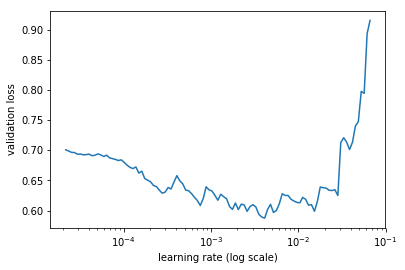

In [47]:
m.sched.plot()

In [48]:
lr = 1e-3
m.fit(lr, 1, metrics=[accuracy, f1, precision, recall])
m.fit(lr, 2, cycle_len=2, cycle_mult=3, metrics=[accuracy, f1, precision, recall])
preds = np.argmax(m.predict(), axis=1)

epoch      trn_loss   val_loss   accuracy   f1         precision  recall     
    0      0.480019   0.456822   0.775281   0.68623    0.785019   0.677154  



epoch      trn_loss   val_loss   accuracy   f1         precision  recall     
    0      0.421206   0.464718   0.797753   0.727749   0.803745   0.725094  
    1      0.364112   0.480951   0.803371   0.73153    0.807491   0.730337  
    2      0.369018   0.651714   0.758427   0.574548   0.764045   0.523596  
    3      0.319601   0.546285   0.792135   0.704937   0.849438   0.668165  
    4      0.267364   0.553152   0.769663   0.623451   0.838202   0.566292  
    5      0.257259   0.549624   0.752809   0.669964   0.74596    0.677154  
    6      0.22566    0.575599   0.758427   0.679595   0.753451   0.68839   
    7      0.225748   0.580915   0.758427   0.679595   0.753451   0.68839   



In [49]:
x = m.model.embs.parameters()
x = list(x)
x

[Parameter containing:
  0.6531  0.4376
 -0.6253 -0.0036
  0.3986 -0.3420
 -0.2212 -0.4651
 [torch.cuda.FloatTensor of size 4x2 (GPU 0)], Parameter containing:
 -0.4729  0.5867
  0.6332 -0.0253
  0.0321  0.5149
 [torch.cuda.FloatTensor of size 3x2 (GPU 0)], Parameter containing:
 -0.0341  0.0167  0.0017  ...   0.0195 -0.0246  0.0166
 -0.0195 -0.0438  0.0838  ...   0.0293 -0.0827  0.0777
  0.0348 -0.0592 -0.0438  ...   0.0807 -0.0679  0.0234
           ...             ⋱             ...          
  0.0119  0.0010 -0.0591  ...  -0.0388  0.0558 -0.0538
 -0.0196 -0.0209 -0.0218  ...   0.0522 -0.0607  0.0399
 -0.0361  0.0205 -0.0271  ...   0.0030  0.0409  0.0407
 [torch.cuda.FloatTensor of size 90x45 (GPU 0)], Parameter containing:
 -0.0664 -0.3359  0.2294 -0.0580
 -0.0054 -0.1990 -0.1934 -0.2930
  0.1858 -0.0303  0.2535 -0.2184
  0.2017 -0.0640  0.2951  0.0336
  0.0272  0.3262 -0.0505 -0.0029
  0.1202  0.0128  0.2332  0.2489
 -0.2282  0.4733 -0.0697  0.0071
 -0.1043 -0.1549 -0.2351 -0.1713


In [43]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.250000,NaN,S
1,1,1,female,38.0,1,0,71.283302,C85,C
2,1,3,female,26.0,0,0,7.925000,NaN,S
3,1,1,female,35.0,1,0,53.099998,C123,S
4,0,3,male,35.0,0,0,8.050000,NaN,S


In [46]:
y

array([[ 0.01315,  0.005  , -0.01038, ...,  0.01802,  0.04413, -0.02038],
       [-0.02924, -0.0589 ,  0.00635, ..., -0.00584,  0.07427, -0.05797],
       [-0.03111, -0.02184,  0.03238, ..., -0.06793,  0.07064, -0.03419],
       ...,
       [ 0.00183,  0.00462,  0.02031, ...,  0.0296 , -0.00392,  0.03393],
       [ 0.03059,  0.02805, -0.02236, ...,  0.0004 ,  0.00275,  0.01341],
       [ 0.02999, -0.02648, -0.02232, ..., -0.00472,  0.03067,  0.03712]], dtype=float32)